In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https

# Este ambiente Python 3 vem com muitas bibliotecas analíticas úteis instaladas
# É definido pela imagem Docker kaggle / python: https://github.com/kaggle/docker-python
# Por exemplo, aqui estão vários pacotes úteis para carregar://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Os arquivos de dados de entrada estão disponíveis no diretório somente leitura "../input/"
# Por exemplo, executando isto (clicando em executar ou pressionando Shift + Enter) irá listar todos os arquivos no diretório de entrada


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Você pode gravar até 20 GB no diretório atual (/ kaggle / working /) que é preservado como saída quando você cria uma versão usando "Salvar e executar tudo"
# Você também pode gravar arquivos temporários em / kaggle / temp /, mas eles não serão salvos fora da sessão atual

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.drop(columns = ['PassengerId','Ticket','Cabin','Name', 'Embarked'],inplace = True)

In [4]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<AxesSubplot:>

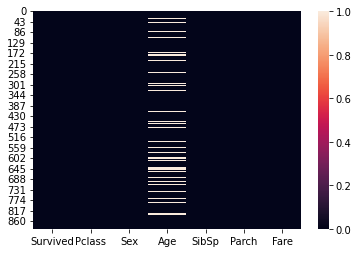

In [5]:
import seaborn as sns
sns.heatmap(data.isnull())

In [6]:
data.Age = data.Age.fillna(0)
#data.Embarked = data.Embarked.fillna(0)

In [7]:
data['Sex'] = data['Sex'].map({'female':1,'male':0}).astype(int)

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,0.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [9]:
#x = data.iloc[:,0:11]
x = data.iloc[:,0:8]
y = data['Survived']

In [10]:
x = data.drop(columns = ['Survived'])

In [11]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,0.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
#iloc[:,8].unique()
x.iloc[:,1].unique()

array([0, 1])

In [14]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,0.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [15]:
# nominal_col = [1]
# ordinal_col = []
#numeric_col = [0,1,3,4,6,7,8]
numeric_col = [0,1,3,4]

#KBin_col = [5]
#Bina_col = [2]
KBin_col = [5]
Bina_col = [2]

In [16]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer,Binarizer 
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans  = make_column_transformer((StandardScaler(),numeric_col),
                                 (KBinsDiscretizer(),KBin_col),
                                 (Binarizer(threshold = 50),Bina_col),
                                  remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 3, 4]),
                                ('kbinsdiscretizer', KBinsDiscretizer(), [5]),
                                ('binarizer', Binarizer(threshold=50), [2])])

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.34)  

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(9)
pipe = make_pipeline(trans,model)


In [19]:
model

KNeighborsClassifier(n_neighbors=9)

In [20]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 3, 4]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [21]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
659,1,0,58.00,0,2,113.2750
695,2,0,52.00,0,0,13.5000
629,3,0,0.00,0,0,7.7333
793,1,0,0.00,0,0,30.6958
47,3,1,0.00,0,0,7.7500
...,...,...,...,...,...,...
600,2,1,24.00,2,1,27.0000
142,3,1,24.00,1,0,15.8500
850,3,0,4.00,4,2,31.2750
644,3,1,0.75,2,1,19.2583


In [22]:
y_train

659    0
695    0
629    0
793    0
47     1
      ..
600    1
142    1
850    0
644    1
412    1
Name: Survived, Length: 588, dtype: int64

In [23]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 3, 4]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [24]:
pred = pipe.predict(x_test)


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

83.4983498349835

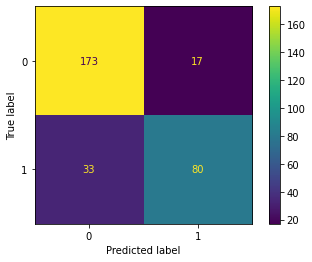

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe,x_test,y_test)


In [27]:
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# model_n =SVC(kernel='linear')
# pipe_n = make_pipeline(trans,model_n)
# pipe_n.fit(x_train,y_train)
# pred_n = pipe_n.predict(x_test)
# accuracy_score(pred_n,y_test)*100

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
model_2 = LogisticRegression(solver = 'liblinear')
pipe_2 = make_pipeline(trans,model_2)

In [29]:
model_2

LogisticRegression(solver='liblinear')

In [30]:
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 3, 4]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [31]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 3, 4]),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(), [5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=50),
                                                  [2])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [32]:
pred_2 = pipe_2.predict(x_test)


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_2,y_test)*100

82.83828382838284

In [34]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [35]:
test_data = test_data.drop(columns = ['PassengerId','Name','Ticket','Cabin', 'Embarked'])


In [36]:
test_data.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [37]:
test_data.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [38]:
test_data['Sex'] = test_data['Sex'].map({'female':1,'male':0}).astype(int)
#test_data['Embarked_S'] = test_data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
#test_data['Embarked_Q'] = test_data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)
#test_data['Embarked_C'] = test_data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)

In [39]:
test_data.Age = test_data.Age.fillna(0)
test_data.Fare = test_data.Fare.fillna(0)

In [40]:
#test_data.drop(columns = ['Embarked'],inplace = True)

In [41]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,0.0,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,3,0,38.5,0,0,7.2500
416,3,0,0.0,0,0,8.0500


In [42]:
test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [43]:
test_data.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [44]:
submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [45]:
submission_data.drop(columns = ['PassengerId'],inplace = True)
submission_data

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [46]:
#Here model_2 is LogesticRegression
model_2.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
from sklearn.metrics import accuracy_score
model_2.score(x_train,y_train)*100


77.38095238095238

In [48]:
prediction_model_2 = model_2.predict(test_data)

In [49]:
accuracy_score(prediction_model_2,submission_data)*100

94.97607655502392

In [50]:
print("Train Accuracy: {:.5f}%".format(model_2.score(x_train,y_train)*100))
print('Test Accuracy: {:.5f}%'.format(accuracy_score(prediction_model_2,submission_data)*100))


Train Accuracy: 77.38095%
Test Accuracy: 94.97608%
